In [6]:
import os
import PIL
import matplotlib.pyplot as plt
import numpy as np
import shutil
import random

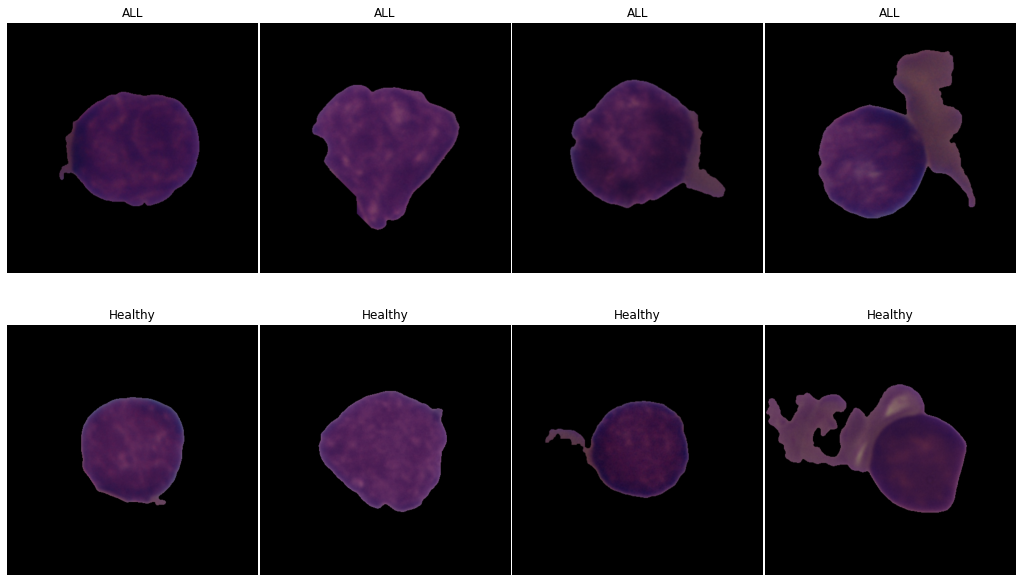

In [4]:
images = [['unzipped_data/ALL/UID_1_1_1_all.bmp', 'ALL'], ['unzipped_data/ALL/UID_47_36_3_all.bmp', 'ALL'], 
          ['unzipped_data/ALL/UID_67_10_5_all.bmp', 'ALL'], ['unzipped_data/ALL/UID_11_37_1_all.bmp', 'ALL'],
          ['unzipped_data/hem/UID_H2_14_1_hem.bmp', 'Healthy'], ['unzipped_data/hem/UID_H2_24_1_hem.bmp', 'Healthy'],
          ['unzipped_data/hem/UID_H10_60_1_hem.bmp', 'Healthy'], ['unzipped_data/hem/UID_H18_6_3_hem.bmp', 'Healthy']]
          
          
plt.figure(figsize=(14,8))

for i in range (0,8):
    image = np.array(PIL.Image.open(images[i][0]))

    plt.subplot(2, 4, i+1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(images[i][1])
    
plt.subplots_adjust(left=0, right=1, bottom=0, top=1, wspace=0.01, hspace=0.1)
plt.show()



In [15]:
data_dir = 'unzipped_data//'
train_dir = 'data_holder/training'
validation_dir = 'data_holder/validation'
test_dir = 'data_holder/test'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

train_split, val_split, test_split = 0.8, 0.1, 0.1

pass_list = ['rotation90', 'rotation180', 'rotation270',
             'verticalflip', 'horizontalflip', 'transpose']



In [19]:
for class_dir in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_dir)
    
    files = os.listdir(class_path)
    random.shuffle(files)
    
    train_set = files[:int(len(files) * train_split)]
    val_set = files[int(len(files) * train_split):int(len(files) * (train_split + val_split))]
    test_set = files[int(len(files) * (train_split + val_split)):]
    
    for file in train_set:
        src = os.path.join(class_path, file)
        dest = os.path.join(train_dir, class_dir, file)
        os.makedirs(os.path.dirname(dest), exist_ok=True)
        shutil.copy(src, dest)
           
    for file in val_set:
        src = os.path.join(class_path, file)
        dest = os.path.join(validation_dir, class_dir, file)
        os.makedirs(os.path.dirname(dest), exist_ok=True)
        shutil.copy(src, dest)

    for file in test_set:
        src = os.path.join(class_path, file)
        dest = os.path.join(test_dir, class_dir, file)
        os.makedirs(os.path.dirname(dest), exist_ok=True)
        shutil.copy(src, dest)

In [14]:
len(val_set)

339

'0.10.4'

In [20]:
def image_cropper(image, output_directory):
    
    # Define the crop box
    crop_box = (75, 75, 375, 375)
    
    # Crop the image
    cropped_image = image.crop(crop_box)
    
    return cropped_image

In [35]:
def augmentation_function(image_path, output_directory):
    image = PIL.Image.open(image_path)
    image = image_cropper(image, output_directory)
    image.save(os.path.join(output_directory, image_path.split('/')[-1][:-4] + '.PNG'))
    
    
    # counterclockwise rotation 90
    rotated_image = image.rotate(90)
    rotated_image.save(os.path.join(output_directory, image_path.split('/')[-1][:-4] + '_rotation90.PNG'))
    
#     # counterclockwise rotation 180
#     rotated_image = image.rotate(180)
#     rotated_image.save(os.path.join(output_directory, image_path.split('/')[-1][:-4] + '_rotation180.PNG'))
    
#     # counterclockwise rotation 270
#     rotated_image = image.rotate(270)
#     rotated_image.save(os.path.join(output_directory, image_path.split('/')[-1][:-4] + '_rotation270.PNG'))

    # Transpose the image
    transposed_image = image.transpose(PIL.Image.TRANSPOSE)
    transposed_image.save(os.path.join(output_directory, image_path.split('/')[-1][:-4] + '_transpose.PNG'))

    # Flip the image horizontally
    flipped_horizontal_image = image.transpose(PIL.Image.FLIP_LEFT_RIGHT)
    flipped_horizontal_image.save(os.path.join(output_directory, image_path.split('/')[-1][:-4] + '_horizontalflip.PNG'))
    
#     # Flip the image vertically
#     flipped_vertical_image = image.transpose(PIL.Image.FLIP_TOP_BOTTOM)
#     flipped_vertical_image.save(os.path.join(output_directory, image_path.split('/')[-1][:-4] + '_verticalflip.PNG'))
    
    


In [22]:
os.makedirs('C_NMC_2019_dataset/training/ALL', exist_ok=True)
os.makedirs('C_NMC_2019_dataset/training/hem', exist_ok=True)
os.makedirs('C_NMC_2019_dataset/validation/ALL', exist_ok=True)
os.makedirs('C_NMC_2019_dataset/validation/hem', exist_ok=True)
os.makedirs('C_NMC_2019_dataset/test/ALL', exist_ok=True)
os.makedirs('C_NMC_2019_dataset/test/hem', exist_ok=True)

In [38]:
# augmentions: rotation90, horizontal flip, matrix transpose

# change subset to training, validation and test and run this cell for each one.
class_path = 'data_holder/training/ALL'
files = os.listdir(class_path)

for file in files:
        image_path = os.path.join(class_path, file)
        augmentation_function(image_path, 'C_NMC_2019_dataset/training')


In [34]:
# augmentions: rotation90, rotation180, rotation270, horizontal flip, vertical flip, matrix transpose

# change subset to training, validation and test and run this cell for each one.
class_path = 'data_holder/test/hem'
files = os.listdir(class_path)

for file in files:
        image_path = os.path.join(class_path, file)
        augmentation_function(image_path, 'C_NMC_2019_dataset/test')

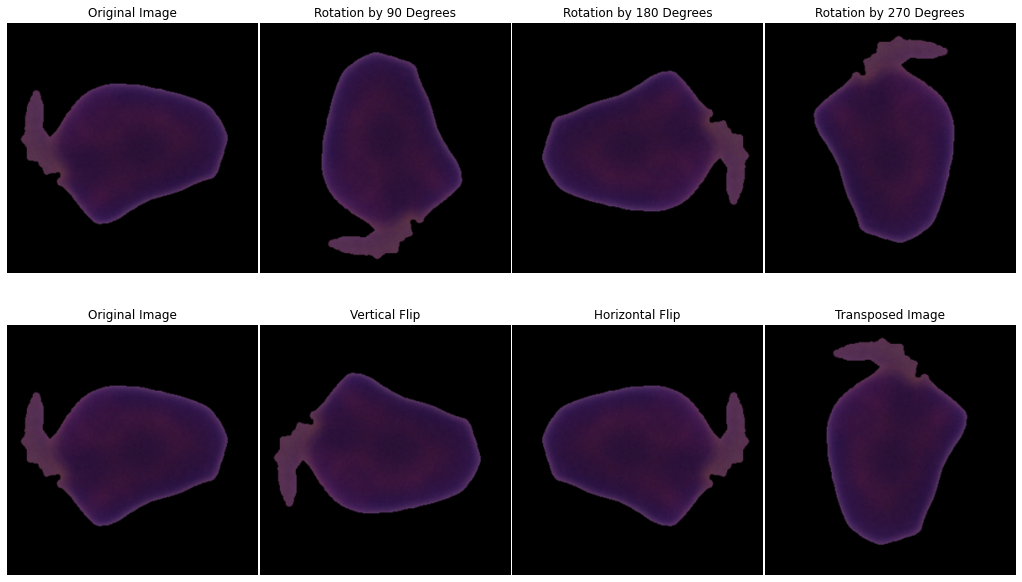

In [128]:
images = [['C_NMC_2019/hem/UID_H18_9_1_hem.PNG', 'Original Image'], ['C_NMC_2019/hem/UID_H18_9_1_hem_rotation90.PNG', 'Rotation by 90 Degrees'], 
          ['C_NMC_2019/hem/UID_H18_9_1_hem_rotation180.PNG', 'Rotation by 180 Degrees'], ['C_NMC_2019/hem/UID_H18_9_1_hem_rotation270.PNG', 'Rotation by 270 Degrees'],
          ['C_NMC_2019/hem/UID_H18_9_1_hem.PNG', 'Original Image'], ['C_NMC_2019/hem/UID_H18_9_1_hem_verticalflip.PNG', 'Vertical Flip'],
          ['C_NMC_2019/hem/UID_H18_9_1_hem_horizontalflip.PNG', 'Horizontal Flip'], ['C_NMC_2019/hem/UID_H18_9_1_hem_transpose.PNG', 'Transposed Image']]
          
          
plt.figure(figsize=(14,8))

for i in range (0,8):
    image = np.array(PIL.Image.open(images[i][0]))

    plt.subplot(2, 4, i+1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(images[i][1])
    
plt.subplots_adjust(left=0, right=1, bottom=0, top=1, wspace=0.01, hspace=0.1)
plt.show()

In [45]:
print(len(os.listdir('C_NMC_2019_dataset/training/ALL//')), len(os.listdir('C_NMC_2019_dataset/training/hem//')))
print(len(os.listdir('C_NMC_2019_dataset/validation/ALL//')), len(os.listdir('C_NMC_2019_dataset/validation/hem//')))
print(len(os.listdir('C_NMC_2019_dataset/test/ALL//')), len(os.listdir('C_NMC_2019_dataset/test/hem//')))

23268 18977
2908 2373
2912 2373


In [46]:
def remove_files(path, keep_count, augmentation_method):
    files = os.listdir(path)
    delete_counter = 0

    for file in files:
        
        if augmentation_method in file:
            
            if delete_counter >= len(files) - keep_count:
                break
            delete_counter += 1
            os.remove(os.path.join(path, file))
            
    print(f"{delete_counter} files have been removed!")

In [51]:
# change subset to training, validation and test and run this cell for each one.

path_ALL = 'C_NMC_2019_dataset/test/ALL/'
path_healthy = 'C_NMC_2019_dataset/test/hem/'
augmentation_method = 'horizontalflip'
keep_count = 2360

remove_files(path_ALL, keep_count, augmentation_method)
remove_files(path_healthy, keep_count, augmentation_method)

552 files have been removed!
13 files have been removed!


In [52]:
print(len(os.listdir('C_NMC_2019_dataset/training/ALL//')), len(os.listdir('C_NMC_2019_dataset/training/hem//')))
print(len(os.listdir('C_NMC_2019_dataset/validation/ALL//')), len(os.listdir('C_NMC_2019_dataset/validation/hem//')))
print(len(os.listdir('C_NMC_2019_dataset/test/ALL//')), len(os.listdir('C_NMC_2019_dataset/test/hem//')))

18880 18880
2360 2360
2360 2360
